# $\S$ 3.2. Linear Regression Models and Least Squares

### The linear model

We have
* an input vector $X^T = (X_1, X_2, \cdots, X_p)$ and
* a real-valued output $Y$ to predict.

The linear regression model has the form with unknown parameters $\beta_j$'s,

\begin{equation}
f(X) = \beta_0 + \sum_{j=1}^p X_j\beta_j.
\end{equation}

The linear model either assumes that the regression function $\text{E}(Y|X)$ is linear, or that the linear model is a reasonable approximation.

The variable $X_j$ can come from different sources:
* Quantitative inputs, and its transformations, e.g., log, squared-root, square,
* basis expansions, e.g., $X_2=X_1^2, X_3=X_1^3$, leading to a polynomial representation,
* numeric or "dummy" coding of the levels of qualitative inputs.  
  For example, if $G$ is a five-level factor input, we might create $X_j=I(G=j),$ for $j = 1,\cdots,5$.
* Interactions between variables, e.g., $X_3=X_1\cdot X_2$.

No matter the source of the $X_j$, the model is linear in the parameters.

### Least squares fit

Typically we have a set of training data
* $(x_1, y_1), \cdots, (x_N, y_N)$ from which to estimate the parameters $\beta$.
* Each $x_i = (x_{i1}, x_{i2}, \cdots, x_{ip})^T$ is a vector of feature measurements for the $i$th case.

The most popular estimation method is _least squares_, in which we pick coefficients $\beta=(\beta_0,\beta_1,\cdots,\beta_p)^T$ to minimize the residual sum of squares

\begin{align}
\text{RSS}(\beta) &= \sum_{i=1}^N\left(y_i - f(x_i)\right)^2 \\
&= \sum_{i=1}^N \left(y_i - \beta_0 - \sum_{j=1}^px_{ij}\beta_j\right)^2.
\end{align}

From a statistical point of view, this criterion is reasonable if the training observations $(x_i,y_i)$ represent independent random draws from their population. Even if the $x_i$’s were not drawn randomly, the criterion is still valid if the $y_i$’s are conditionally independent given the inputs $x_i$.

See FIGURE 3.1 in the textbook for illustration of the geometry of least-squares fitting in $\mathbb{R}^{p+1}$ space occupied by the pairs $(X,Y)$.

> Note that RSS makes no assumptions about the validity of the linear model; it simply finds the best linear fit to the data. Least squares fitting is intuitively satisfying no matter how the data arise; the criterion measures the average lack of fit.

### Solution of least squares

How do we minimize RSS?

Denote
* $\mathbf{X}$ the $N\times(p+1)$ matrix with each row an input vector (with a 1 in the first position),
* $\mathbf{y}$ the $N$-vector of outputs in the training set.

Then we can write RSS as

\begin{equation}
\text{RSS}(\beta) = \left(\mathbf{y}-\mathbf{X}\beta\right)^T\left(\mathbf{y}-\mathbf{X}\beta\right) = \|\mathbf{y}-\mathbf{X}\beta\|^2.
\end{equation}

This is a quadratic function in the $p+1$ parameters. Differentiating w.r.t. $\beta$ we obtain

\begin{align}
\frac{\partial\text{RSS}}{\partial\beta} &= -2\mathbf{X}^T\left(\mathbf{y}-\mathbf{X}\beta\right) \\
\frac{\partial^2\text{RSS}}{\partial\beta\partial\beta^T} &= 2\mathbf{X}^T\mathbf{X}
\end{align}

Assuming (for the moment) that $\mathbf{X}$ has full column rank, and hence $\mathbf{X}^T\mathbf{X}$ is positive definite (therefore it is guaranteed to the unique minimum exists), we set the first derivative to zero

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0
\end{equation}

to obtain the unique solution

\begin{equation}
\hat\beta = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}.
\end{equation}

The predicted values at an input vector $x_0$ are given by

\begin{equation}
\hat{f}(x_0) = (1:x_0)^T\hat\beta,
\end{equation}

and fitted values at the training samples are

\begin{equation}
\hat{y} = \mathbf{X}\hat\beta = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y} = \mathbf{H}\mathbf{y},
\end{equation}

where $\hat{y_i}=\hat{f}(x_i)$. The matrix

\begin{equation}
\mathbf{H} = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T
\end{equation}

is sometimes called the "hat" matrix because it puts the hat on $\mathbf{y}$.

### Geometrical representation of the least squares estimate

FIGURE 3.2 shows a different geometrical representation of the least squares estimate, this time in $\mathbb{R}^N$.

We denote the column vector of $\mathbf{X}$ by $\mathbf{x}_0$, $\mathbf{x}_1$, $\cdots$, $\mathbf{x}_p$, with $\mathbf{x}_0 \equiv 1$. For much of what follows, this forst column is treated like any other.

These vectors span a subspace of $\mathbb{R}^N$, also referred to as the column space of $\mathbf{X}$ denoted by $\text{col}(\mathbf{X})$. We minimize RSS by choosing $\hat\beta$ so that the residual vector $\mathbf{y}-\hat{\mathbf{y}}$ is orthogonal to this subspace. This orthogonality is expressed in

\begin{equation}
\mathbf{X}^T(\mathbf{y}-\mathbf{X}\beta) = 0,
\end{equation}

and the resulting estimate $\hat{\mathbf{y}}$ is hence the _orthogonal projection_ of $\mathbf{y}$ onto this subspace. The hat matrix $\mathbf{H}$ computes the orthogonal projection, and hence it is also known as a projection matrix.

#### Rank deficiency
It might happen that the columns of $\mathbf{X}$ are not linearly independent, so that $\mathbf{X}$ is not of full rank. This would occur, for example, if two of the inputs were perfectly correlated, e.g., $\mathbf{x}_2=3\mathbf{x}_1$.

Then $\mathbf{X}^T\mathbf{X}$ is singular and the least squares coefficients $\hat\beta$ are not uniquely defined. However, the fitted values $\hat{\mathbf{y}}=\mathbf{X}\hat\beta$ are still the projection of $\mathbf{y}$ onto the $\text{col}(\mathbf{X})$; there are just more than one way to express that projection in terms of the column vectors of $\mathbf{X}$.

The non-full-rank case occurs most often when one or more qualitative inputs are coded in a redundant fashion.

There is usually a natural way to resolve the non-unique representation, by recording and/or dropping redundant columns in $\mathbf{X}$. Most regression software packages detect these redundancies and automatically implement some strategy for removing them.

Rank deficientcies can also occur in signal and image analysis, where the number of inputs $p$ can exceed the number of training cases $N$. In this case, the features are typically reduced by filtering or else the fitting is controlled by regularization ($\S$ 5.2.3 and Chapter 18).

### Sampling properties of $\hat\beta$

Up to now we have made minimal assumptions about the true distribution of the data. In order to pin down the sampling properties of $\hat\beta$, we now assume that
* the observations $y_i$ are uncorrelated and
* $y_i$ have constant variance $\sigma^2$,
* the $x_i$ are fixed (nonrandom).

The variance-covariance matrix of the least squares estmiates is

\begin{align}
\text{Var}(\hat\beta) &= \text{Var}\left(\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}\right) \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\text{Var}\left(\mathbf{y}\right)\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \\
&= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2.
\end{align}

Typically one estimates the variance $\sigma^2$ by

\begin{equation}
\hat\sigma^2 = \frac{1}{N-p-1}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2,
\end{equation}

where the denominator $N-p-1$ rather than $N$ makes $\hat\sigma^2$ an unbiased estimate of $\sigma^2$:

\begin{equation}
\text{E}(\hat\sigma^2) = \sigma^2.
\end{equation}

### Inference and hypothesis testing
To draw inferences about the parameters and the model, additional assumptions are needed. We now assume that
* the linear model $f(X) = \beta_0 + \sum_{j=1}^p \beta_j X_j$ is the correct model for the mean.
  i.e., the conditional expectation of $Y$ is linear in $X$;
* the deviations of $Y$ around its expectation are additive and Gaussian.

Hence

\begin{align}
Y &= \text{E}\left(Y|X_1,\cdots,X_p\right)+\epsilon \\
&= \beta_0 + \sum_{j=1}^p X_j\beta_j + \epsilon,
\end{align}

where $\epsilon\sim N(0,\sigma^2)$. Then it is easy to show that

\begin{align}
\hat\beta\sim N\left(\beta, \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\sigma^2\right), \\
(N-p-1)\hat\sigma^2\sim\sigma^2\chi^2_{N-p-1}.
\end{align}

In addition $\hat\beta$ and $\hat\sigma^2$ are statistically independent.

We use these distributional properties to form tests of hypothesis and confidence intervals for the parameters $\beta_j$. To test the null hypothesis $\mu_0: \beta_j=0$, we form the standardized coefficient or _Z-score_

\begin{equation}
z_j = \frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}},
\end{equation}

where $v_j = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}_{jj}$.

Under the null hypothesis, $z_j\sim t_{N-p-1}$, and hence a large (absolute) value of $z_j$ will lead to rejection of this null hypothesis.

If $\hat\sigma$ is replaced by a known value $\sigma$, then $z_j$ would have a standard normal distribution. The difference between the tail quatiles of $t$-distribution and a standard normal distribution become negligible as the sample size increases, so we typically use the normal quantiles (see FIGURE 3.3).

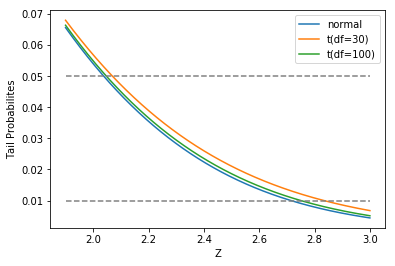

In [1]:
"""FIGURE 3.3. The tail probabilities for three distributions, t30, t100, N(0,1).

Pr(|Z| > z) for three distributions, t(df=30), t(df=100), and standard normal.
The difference between t and the standard normal becomes negligible for N > 100.
"""
import matplotlib.pyplot as plt
import scipy
import scipy.stats

x = scipy.linspace(1.9, 3, 1000)
pdf_gaussian = scipy.stats.norm.pdf(x)
pdf_t30 = scipy.stats.t.pdf(x, df=30)
pdf_t100 = scipy.stats.t.pdf(x, df=100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, pdf_gaussian, label='normal')
ax.plot(x, pdf_t30, label='t(df=30)')
ax.plot(x, pdf_t100, label='t(df=100)')
ax.legend()
ax.plot([1.9, 3], [.01, .01], '--', color='gray')
ax.plot([1.9, 3], [.05, .05], '--', color='gray')
ax.set_xlabel('Z')
ax.set_ylabel('Tail Probabilites')
plt.show()

Often we need to test for the significance of groups of coefficients simultaneously. For example, to test if a categorical variable with $k$ levels can be excluded from a model, we need to test whether the coefficients of the dummy variables used to represent the levels can all be set to zero.

Here we use the $F$ statistics,

\begin{equation}
F = \frac{(\text{RSS}_0-\text{RSS}_1)/(p_1-p_0)}{\text{RSS}_1/(N-p_1-1)},
\end{equation}

where
* $\text{RSS}_1$ is for the bigger model with $p_1+1$ parameters and
* $\text{RSS}_0$ for the nested smaller model with $p_0+1$ parameters,
* having $p_1-p_0$ parameters constrained to be zero.

The $F$ statistic measures the change in residual sum-of-squares per additional parameter in the bigger model, and it is normalized by an estimate of $\sigma^2$.

Under the Gaussian assumption, and the null hypothesis that the smaller models is correct, the $F$ statistics will have a $F_{p_1-p_0,N-p_1-1}$ distribution. It can be shown (Exercose 3.1) that the $t$-statistic $z_j = \hat\beta_j \big/ (\hat\sigma \sqrt{v_j})$ are equivalent to the $F$ statistic for dropping the single coefficient $\beta_j$ from the model.

For large $N$, the quantiles of $F_{p_1-p_0,N-p_1-1}$ approaches those of $\chi^2_{p_1-p_0}/(p_1-p_0)$.

### Confidence intervals

Similarly, we can isolate $\beta_j$ in $\hat\beta \sim N(\beta, \left(\mathbf{X}^T \mathbf{X}\right)^{-1}\sigma^2)$ to obtain a $1-2\alpha$ confidence interval for $\beta_j$:

\begin{equation}
\left(\hat\beta_j-z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma, \hat\beta_j+z^{1-\alpha}v_j^{\frac{1}{2}}\hat\sigma\right),
\end{equation}

where $z^{(1-\alpha)}$ is the $1-\alpha$ percentile of the normal distribution:

\begin{align}
z^{(1-0.025)} &= 1.96, \\
z^{(1-0.05)} &= 1.645, \text{etc}.
\end{align}

Hence the standard practice of reporting $\hat\beta \pm 2\cdot \text{se}(\hat\beta)$ amounts to an approximate 95% confidence interval.

Even if the Gaussian error assumption does not hold, this interval will be approximately corrent, with its coverage approaching $1-2\alpha$ as the sample size $N \rightarrow \infty$.

In a similar fashion we can obtain an approximate confidence set for the entire parameter vector $\beta$, namely

\begin{equation}
C_\beta = \left\{ \beta \big| (\hat\beta-\beta)^T\mathbf{X}^T\mathbf{X}(\hat\beta-\beta) \le \hat\sigma^2{\chi^2_{p+1}}^{(1-\alpha)}\right\},
\end{equation}

where ${\chi_l^2}^{(1-\alpha)}$ is the $1-\alpha$ percentile of the chi-squared distribution on $l$ degrees of freedom;

\begin{align}
{\chi_5^2}^{(1-0.05)} &= 11.1, \\
{\chi_5^2}^{(1-0.1)} &= 9.2.
\end{align}

This condifence set for $\beta$ generates a corresponding confidence set for the true function $f(x) = x^T\beta$, namely

\begin{equation}
\left\{ x^T\beta \big| \beta \in C_\beta \right\}
\end{equation}

(Exercise 3.2; FIGURE 5.4).